In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import requests

In [2]:
srs = pd.read_csv('./data/srs_2019.csv')[['team','rating']]
srs.head()

team     rating
0         LSU  29.366359
1  Ohio State  28.246723
2     Alabama  25.184442
3     Clemson  24.675149
4     Georgia  19.297234

In [3]:
response = requests.get(
    "https://api.collegefootballdata.com/talent",
    params={"year": 2019}
)

talent = pd.read_json(response.text)[['school', 'talent']]
talent.head()

school  talent
0     Alabama  984.96
1  Ohio State  973.56
2     Georgia  960.16
3         USC  915.56
4         LSU  906.17

In [4]:
teams = srs.merge(talent, left_on='team', right_on='school')[['team', 'rating', 'talent']]
teams.head()

team     rating  talent
0         LSU  29.366359  906.17
1  Ohio State  28.246723  973.56
2     Alabama  25.184442  984.96
3     Clemson  24.675149  863.03
4     Georgia  19.297234  960.16

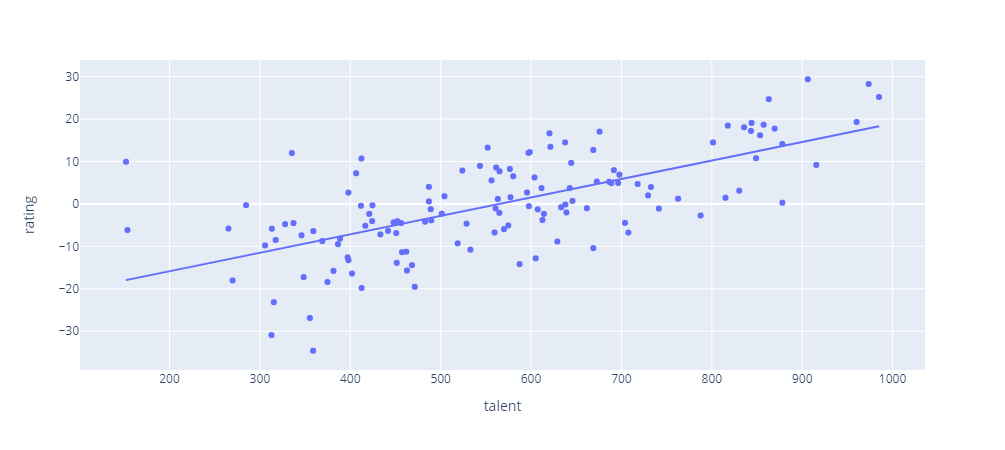

In [5]:
fig = px.scatter(teams, x="talent", y="rating", trendline="ols")
fig.show()

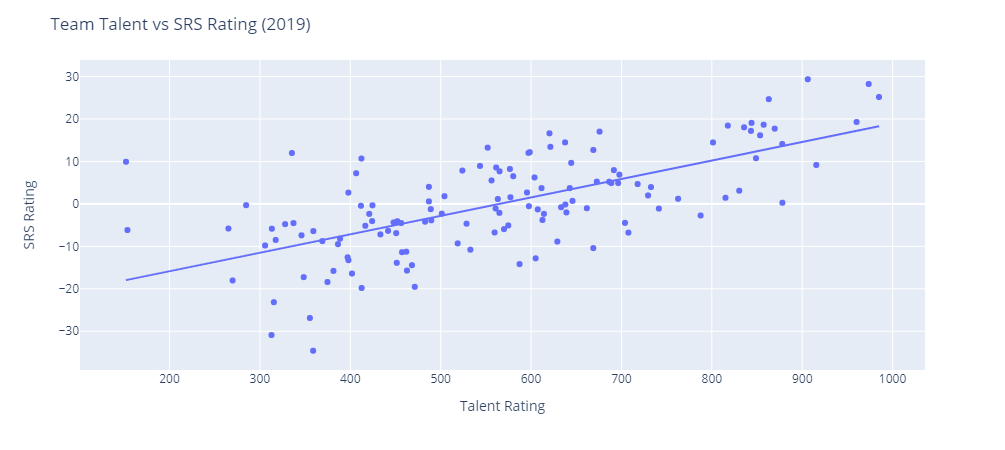

In [6]:
fig = px.scatter(teams, x="talent", y="rating", trendline="ols")
fig.update_layout(
    title="Team Talent vs SRS Rating (2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()

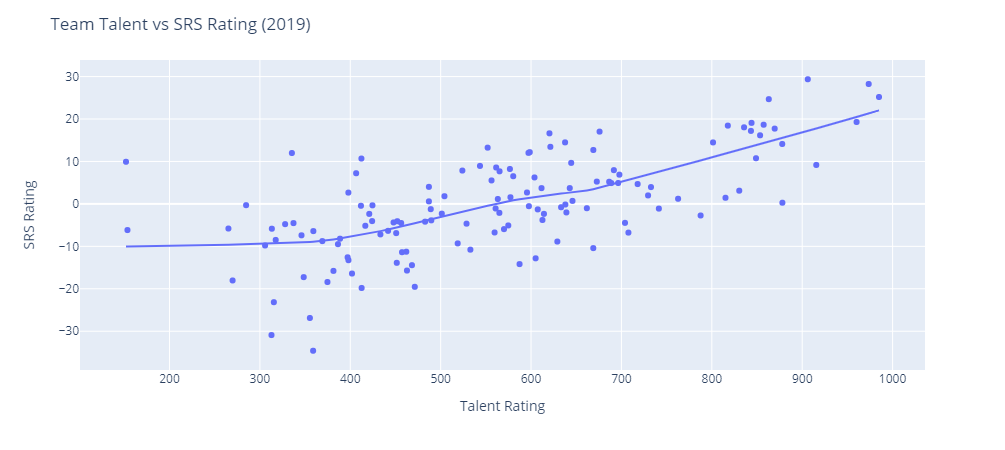

In [7]:
fig = px.scatter(teams, x="talent", y="rating", trendline="lowess")
fig.update_layout(
    title="Team Talent vs SRS Rating (2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()

In [8]:
response = requests.get("https://api.collegefootballdata.com/teams/fbs");
data = pd.read_json(response.text)

teams = teams.merge(data, left_on='team', right_on='school')[['team', 'conference', 'rating', 'talent']]
teams.head()

team conference     rating  talent
0         LSU        SEC  29.366359  906.17
1  Ohio State    Big Ten  28.246723  973.56
2     Alabama        SEC  25.184442  984.96
3     Clemson        ACC  24.675149  863.03
4     Georgia        SEC  19.297234  960.16

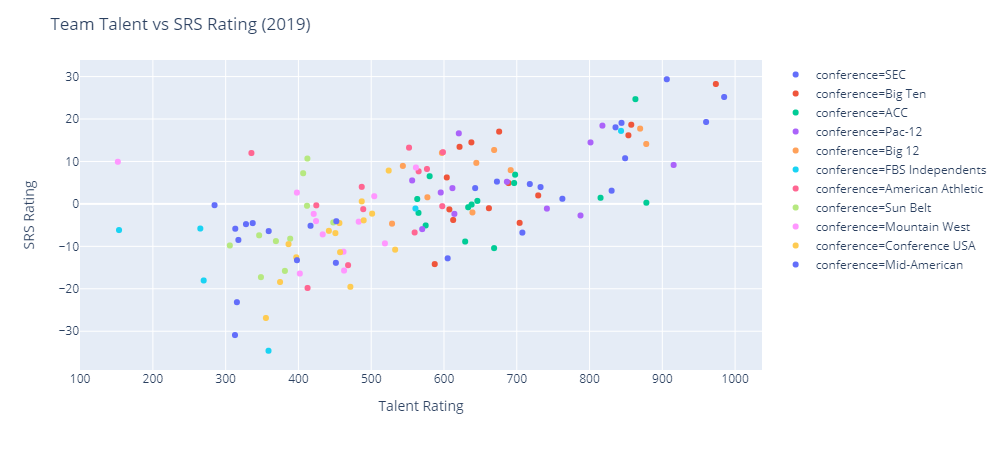

In [9]:
fig = px.scatter(teams, x="talent", y="rating", color='conference')
fig.update_layout(
    title="Team Talent vs SRS Rating (2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()

In [10]:
teams['classification'] = np.where((teams['conference'] == 'SEC') | (teams['conference'] == 'Big Ten') | (teams['conference'] == 'ACC') | (teams['conference'] == 'Pac-12') | (teams['conference'] == 'Big 12') | (teams['team'] == 'Notre Dame'), 'P5+ND', 'G5')
teams.head()

team conference     rating  talent classification
0         LSU        SEC  29.366359  906.17          P5+ND
1  Ohio State    Big Ten  28.246723  973.56          P5+ND
2     Alabama        SEC  25.184442  984.96          P5+ND
3     Clemson        ACC  24.675149  863.03          P5+ND
4     Georgia        SEC  19.297234  960.16          P5+ND

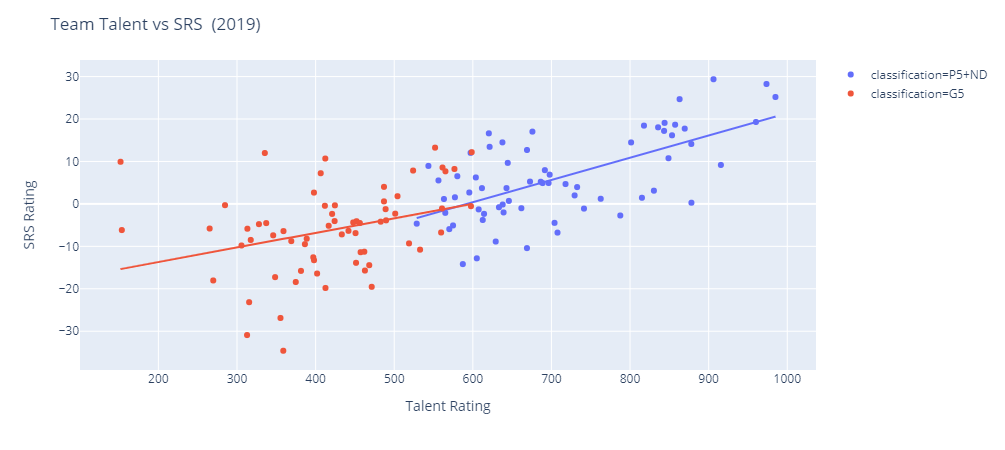

In [11]:
fig = px.scatter(teams, x="talent", y="rating", color='classification', hover_name='team', trendline='ols')
fig.update_layout(
    title="Team Talent vs SRS  (2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()

In [12]:
response = requests.get(
    "https://api.collegefootballdata.com/talent"
)

talent = pd.read_json(response.text)
talent.head()

year      school  talent
0  2019     Alabama  984.96
1  2019  Ohio State  973.56
2  2019     Georgia  960.16
3  2019         USC  915.56
4  2019         LSU  906.17

In [13]:
srs = pd.DataFrame(columns=['year', 'team', 'rating'])
for year in range(2015,2020):
    srs_year = pd.read_csv('./data/srs_{0}.csv'.format(year))
    srs_year['year'] = year
    srs = pd.concat([
        srs,
        srs_year[['year', 'team', 'rating']]
    ])
    
srs.head()

year        team     rating
0  2015     Alabama  25.661929
1  2015     Clemson  20.501528
2  2015  Ohio State  20.340392
3  2015    Oklahoma  19.576555
4  2015    Stanford  19.207754

In [14]:
teams = talent.merge(srs, left_on=['year', 'school'], right_on=['year', 'team'])[['year','team','talent','rating']]
teams.head()

year        team  talent     rating
0  2019     Alabama  984.96  25.184442
1  2019  Ohio State  973.56  28.246723
2  2019     Georgia  960.16  19.297234
3  2019         USC  915.56   9.172613
4  2019         LSU  906.17  29.366359

In [15]:
teams = teams.merge(data, left_on='team', right_on='school')[['year', 'team', 'conference', 'rating', 'talent']]
teams['classification'] = np.where((teams['conference'] == 'SEC') | (teams['conference'] == 'Big Ten') | (teams['conference'] == 'ACC') | (teams['conference'] == 'Pac-12') | (teams['conference'] == 'Big 12') | (teams['team'] == 'Notre Dame'), 'P5+ND', 'G5')
teams.head()

year     team conference     rating  talent classification
0  2019  Alabama        SEC  25.184442  984.96          P5+ND
1  2018  Alabama        SEC  29.330396  978.54          P5+ND
2  2017  Alabama        SEC  23.963126  997.57          P5+ND
3  2016  Alabama        SEC  29.823739  982.66          P5+ND
4  2015  Alabama        SEC  25.661929  981.90          P5+ND

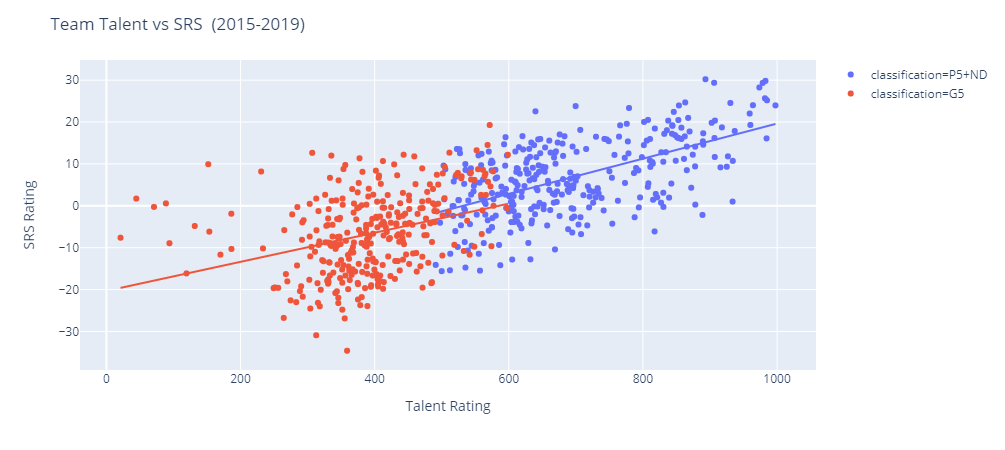

In [19]:
fig = px.scatter(teams, x="talent", y="rating", color='classification', hover_name='team', hover_data=['year','talent','rating'], trendline='ols')
fig.update_layout(
    title="Team Talent vs SRS  (2015-2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()

In [20]:
results = px.get_trendline_results(fig)
results.query("classification == 'P5+ND'").px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     160.9
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           3.42e-30
Time:                        19:30:49   Log-Likelihood:                -1113.1
No. Observations:                 325   AIC:                             2230.
Df Residuals:                     323   BIC:                             2238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2949      2.319     -9.614      0.000     -26.857     -17.733
x1             0.0419      0.003     12.684      0.000       0.035       0.048
==============================================================================
Omnibus:                       10.610   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.703
Skew:                          -0.197   Prob(JB):                       0.0350
Kurtosis:                       2.416   Cond. No.                     3.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

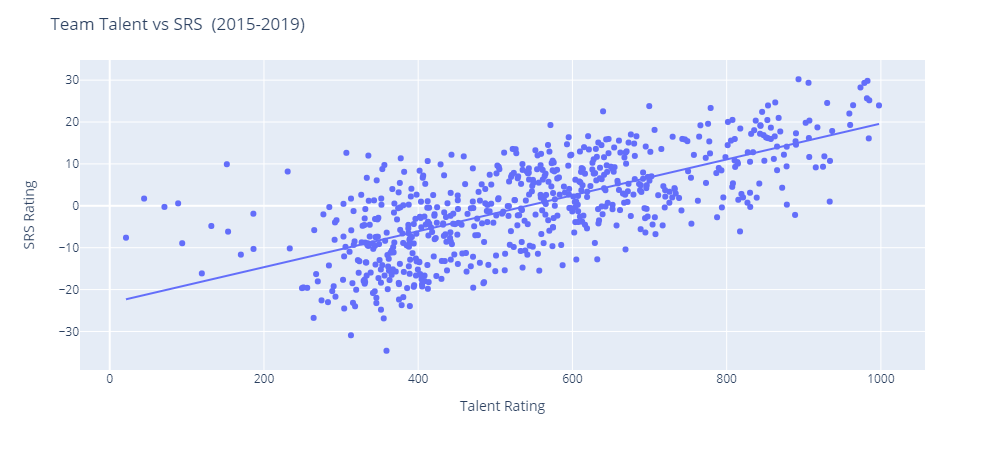

In [21]:
fig = px.scatter(teams, x="talent", y="rating", hover_name='team', hover_data=['year','talent','rating'], trendline='ols')
fig.update_layout(
    title="Team Talent vs SRS  (2015-2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()

In [22]:
grouped = teams.groupby(['classification', 'team']).mean()
grouped = grouped.reset_index()
grouped.head()

classification               team     rating   talent
0             G5          Air Force   0.374812   94.952
1             G5              Akron -13.135598  373.460
2             G5  Appalachian State   6.006185  350.118
3             G5     Arkansas State  -2.344308  439.436
4             G5               Army  -2.433055  180.570

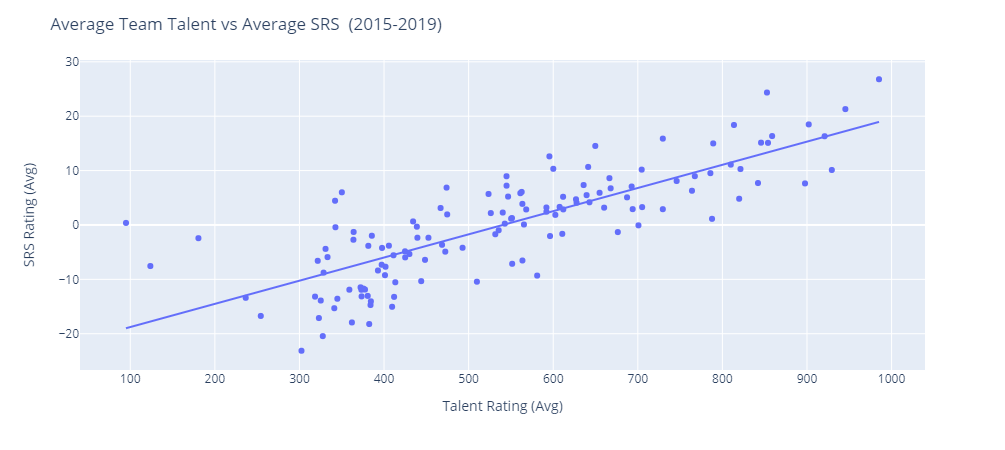

In [23]:
fig = px.scatter(grouped, x="talent", y="rating", hover_name='team', trendline='ols')
fig.update_layout(
    title="Average Team Talent vs Average SRS  (2015-2019)",
    xaxis_title="Talent Rating (Avg)",
    yaxis_title="SRS Rating (Avg)")
fig.show()

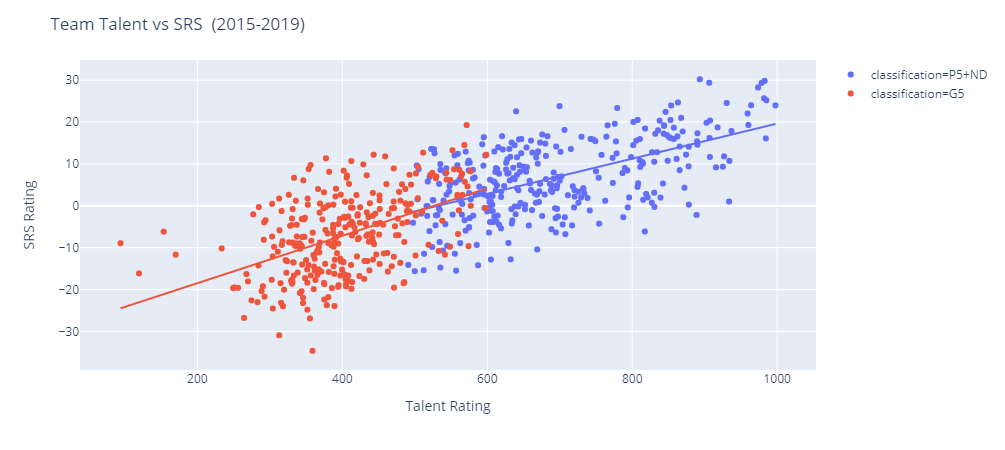

In [24]:
fig = px.scatter(teams.query("team != 'Navy' & team != 'Air Force' & team != 'Army'"), x="talent", y="rating", color='classification', hover_name='team', hover_data=['year','talent','rating'], trendline='ols')
fig.update_layout(
    title="Team Talent vs SRS  (2015-2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()

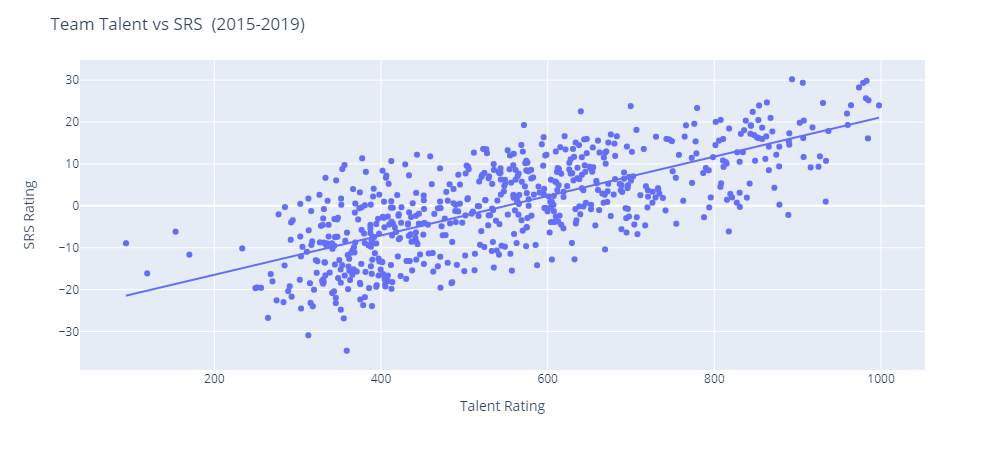

In [25]:
fig = px.scatter(teams.query("team != 'Navy' & team != 'Air Force' & team != 'Army'"), x="talent", y="rating", hover_name='team', hover_data=['year','talent','rating'], trendline='ols')
fig.update_layout(
    title="Team Talent vs SRS  (2015-2019)",
    xaxis_title="Talent Rating",
    yaxis_title="SRS Rating")
fig.show()